In [1]:
#import
import pandas as pd
import numpy as np
import os
from datetime import datetime

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import warnings
import itertools

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, minmax_scale, QuantileTransformer, RobustScaler, StandardScaler

import sklearn.linear_model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [2]:
#define
SESSION_PATH = './sessions'
WELLNESS_PATH = './wellness'
PICKLE_PATH = './pickle/'
format = '%Y-%m-%d'

#colonne da shiftare verso l'alto

lista_colonne_workload = [    
    'workload-1',
    'workload-2',
#     'workload-3',
#     'workload-4',
#     'workload-5'
                        ]
lista_colonne_rpe = [
    'rpe-1',
    'rpe-2',
#     'rpe-3',
#     'rpe-4',
#     'rpe-5'
]
lista_colonne_Go_score = [
    'Go_score-1',
    'Go_score-2',
#     'Go_score-3',
#     'Go_score-4',
#     'Go_score-5'
]

######################################
lista_category = [
    [lista_colonne_workload,'workload'],
    [lista_colonne_rpe,'rpe'],
    [lista_colonne_Go_score,'Go_score']
]
######################################
#colonne per DNN


#pesi per calcolare GO_Score

SLEEP_PAR = [0.1, 0.1, 0.5, 0.8, 1]
STRESS_PAR = [0.1, 0.1, 1, 1, 1]
FATIGUE_PAR = [0.1, 0.1, 0.5, 0.8, 1]
SORENESS_PAR = [0.1, 0.1, 0.5, 0.8, 1]
MOOD_PAR = [0.1, 0.1, 1, 1, 1]

#script per calcolare nomi colonne
nome = 'Go_score'
n = 5
lista = []
for i in range(-n,0):
    lista.append(nome+str(i))
reversed(lista)

In [3]:
def from_str_to_date(stringa):
    timestr = stringa.split(' ')[0]
    time = datetime.strptime(timestr, format)
    return time

def calcola_go(df):
    try:
        df['Go_score'] = SLEEP_PAR[int(df['wellness_sleep']) - 1] + STRESS_PAR[int(df['wellness_stress']) - 1] + FATIGUE_PAR[int(df['wellness_fatigue']) - 1] + SORENESS_PAR[int(df['wellness_soreness']) - 1] + MOOD_PAR[int(df['wellness_mood']) - 1]   
    except:
        pass
    return df

CREO UN DB CON I DATI DI TUTTI I GIOCATORI, CON COLONNE RIFERITE AI GIORNI PRECEDENTI
===========================

In [4]:
# importo csv associati a ogni player
list_files1 = os.listdir(PICKLE_PATH)
list_file = list_files1.copy()

# tolgo dalla lista dei files quelli non di player
for file in list_files1:
    if 'Player' not in file:
        list_file.remove(file)
    elif 'csv' in file:
        list_file.remove(file)

df_total = pd.DataFrame()
#per ogni file, creo e preparo il db da dare al DNN
for file in list_file:
    print(file)
    player = file.split('.')[0]
    globals()[player] = pd.read_pickle(PICKLE_PATH + file)
    
    #calcolo go score
    df_player = globals()[player].apply(calcola_go, axis=1)

    #drop delle colonne inutili
    df_player = df_player.drop(['exercises','wellness_fatigue','wellness_mood',
                                'wellness_sleep','wellness_soreness','wellness_stress','Work Ratio','rpeTl','duration'], axis=1)
    
    ######################################################################################################
    #faccio le colonne shiftate
    for category in lista_category:
        i = 1
        for column in category[0]:
            df_player[column] = df_player[category[1]].shift(i)
            i += 1

    
    df_player = df_player.dropna(how='any')
    
    globals()[player] = df_player.copy()
    df_total = df_total.append(df_player, ignore_index=True)

#rinomino la colonna Player Load
df_total.rename(columns={'Player Load': 'Player_Load'}, inplace=True)

#creo la colonna previsioni
df_total['Go_score+1'] = df_total['Go_score'].shift(-1)

Player1.pickle
Player10.pickle
Player11.pickle
Player12.pickle
Player13.pickle
Player14.pickle
Player15.pickle
Player16.pickle
Player17.pickle
Player18.pickle
Player19.pickle
Player2.pickle
Player20.pickle
Player21.pickle
Player23.pickle
Player24.pickle
Player25.pickle
Player26.pickle
Player27.pickle
Player28.pickle
Player29.pickle
Player3.pickle
Player30.pickle
Player31.pickle
Player32.pickle
Player4.pickle
Player5.pickle
Player6.pickle
Player7.pickle
Player9.pickle


In [5]:
df_total = df_total.replace([np.inf, -np.inf], np.nan)
df_total = df_total.dropna(how = 'any')
df_total

,GD_X,Go_score,Player_Load,cardioWorkload,date,giorni_dopo_game,giorni_prima_game,intensity,kinematicWorkload,mechanicalWorkload,...,playerName,rpe,workload,workload-1,workload-2,rpe-1,rpe-2,Go_score-1,Go_score-2,Go_score+1
0,-1.0,4.4,211.0766,0.0,2017-07-13,-2.0,1.0,52.670960,24.214674,76.465862,...,Player1,2.0,2.228099,1.679902,3.115625,3.0,5.0,4.4,4.4,4.4
1,0.0,4.4,0.0000,0.0,2017-07-14,0.0,0.0,0.000000,0.000000,0.000000,...,Player1,0.0,0.000000,2.228099,1.679902,2.0,3.0,4.4,4.4,3.6
2,0.0,3.6,0.0000,0.0,2017-07-15,0.0,0.0,0.000000,0.000000,0.000000,...,Player1,0.0,0.000000,0.000000,2.228099,0.0,2.0,4.4,4.4,4.4
3,-3.0,4.4,152.2547,0.0,2017-07-19,-2.0,3.0,30.067697,11.966843,16.576010,...,Player1,2.0,0.730554,1.814650,3.897467,4.0,4.0,4.4,4.4,4.4
4,-2.0,4.4,321.7572,0.0,2017-07-20,-2.0,2.0,47.980548,40.598923,92.190335,...,Player1,4.0,2.983724,0.730554,1.814650,2.0,4.0,4.4,4.4,4.6
5,-1.0,4.6,214.3411,0.0,2017-07-21,-2.0,1.0,51.699796,22.170423,60.547669,...,Player1,2.0,1.775337,2.983724,0.730554,4.0,2.0,4.4,4.4,4.4
6,0.0,4.4,0.0000,0.0,2017-07-22,0.0,0.0,0.000000,0.000000,0.000000,...,Player1,0.0,0.000000,1.775337,2.983724,2.0,4.0,4.6,4.4,3.8
7,0.0,3.8,0.0000,0.0,2017-07-23,0.0,0.0,0.000000,0.000000,0.000000,...,Player1,0.0,0.000000,0.000000,1.775337,0.0,2.0,4.4,4.6,4.4
8,2.0,4.4,225.7668,0.0,2017-07-24,2.0,-2.0,49.085328,27.541671,82.128345,...,Player1,3.0,2.453395,0.000000,0.000000,0.0,0.0,3.8,4.4,4.4
9,-2.0,4.4,340.0522,0.0,2017-07-25,-2.0,2.0,51.988453,31.970858,83.537039,...,Player1,4.0,2.675455,2.453395,0.000000,3.0,0.0,4.4,3.8,4.4


In [6]:
df_total.columns.values

array(['GD_X', 'Go_score', 'Player_Load', 'cardioWorkload', 'date',
       'giorni_dopo_game', 'giorni_prima_game', 'intensity',
       'kinematicWorkload', 'mechanicalWorkload', 'metabolicWorkload',
       'perceivedWorkload', 'playerName', 'rpe', 'workload', 'workload-1',
       'workload-2', 'rpe-1', 'rpe-2', 'Go_score-1', 'Go_score-2',
       'Go_score+1'], dtype=object)

In [7]:
df_total['Go_score+1'].value_counts()

5.0    929
4.8    531
4.4    420
4.6    419
4.1    141
4.3    110
4.5     79
3.8     79
3.5     56
4.0     41
3.1     28
3.6     19
2.7     16
3.4     15
3.0     13
3.7     10
3.9      7
0.5      5
3.9      5
3.2      5
3.4      5
1.8      3
2.1      2
1.4      2
2.6      1
2.3      1
2.0      1
3.7      1
2.2      1
1.8      1
0.9      1
Name: Go_score+1, dtype: int64

In [8]:
df_total['workload'].value_counts()

0.000000    1173
1.300000      88
1.500000      76
1.600000      71
1.900000      67
1.800000      65
1.700000      63
1.100000      61
1.200000      58
1.400000      54
2.000000      50
2.100000      48
1.000000      43
0.900000      42
0.800000      41
2.200000      36
2.300000      32
2.400000      29
2.500000      28
2.600000      26
2.700000      25
0.700000      21
0.600000      21
3.100000      21
2.800000      20
3.000000      16
0.500000      15
2.900000      15
4.900000      14
3.300000      14
            ... 
1.928711       1
6.700000       1
1.257129       1
1.236870       1
1.503471       1
5.395674       1
2.924143       1
1.069142       1
1.124399       1
1.423287       1
1.371485       1
2.807509       1
7.961046       1
1.355238       1
1.320644       1
1.041802       1
1.365089       1
1.439165       1
2.654855       1
0.763735       1
2.570409       1
1.410095       1
2.002952       1
1.913590       1
1.789382       1
1.243562       1
1.586596       1
1.998055      

RETE NEURALE 
============================

In [17]:
#define
OUTPUT = 'workload'

In [18]:
#drop colonne inutili
train = df_total.drop(['date','playerName','cardioWorkload','intensity','Player_Load','rpe',
                      'perceivedWorkload', #contiene dati da rpe e quindi è soggettivo
                      'GD_X','giorni_dopo_game', 'giorni_prima_game',
                       #'workload'
                       'kinematicWorkload', 'mechanicalWorkload', 'metabolicWorkload'
                      ],axis = 1)

#drop dati a 0
train = train[train['workload']>0]

#droppo colonne con parametri go troppo bassi
colonne_go = ['Go_score']+lista_colonne_Go_score+['Go_score+1']
        
for colonna in colonne_go:
    train = train[train[colonna]>= 0]

# #muovo go_score+1 in fondo
# serie = train[OUTPUT]
# train = train.drop([OUTPUT],axis=1)
# train[OUTPUT] = serie

input_dataset = train.copy()
train

,Go_score,workload,workload-1,workload-2,rpe-1,rpe-2,Go_score-1,Go_score-2,Go_score+1
0,4.4,2.228099,1.679902,3.115625,3.0,5.0,4.4,4.4,4.4
3,4.4,0.730554,1.814650,3.897467,4.0,4.0,4.4,4.4,4.4
4,4.4,2.983724,0.730554,1.814650,2.0,4.0,4.4,4.4,4.6
5,4.6,1.775337,2.983724,0.730554,4.0,2.0,4.4,4.4,4.4
8,4.4,2.453395,0.000000,0.000000,0.0,0.0,3.8,4.4,4.4
9,4.4,2.675455,2.453395,0.000000,3.0,0.0,4.4,3.8,4.4
10,4.4,2.282718,2.675455,2.453395,4.0,3.0,4.4,4.4,4.4
13,4.1,2.699990,0.000000,0.000000,0.0,0.0,3.5,4.4,4.1
16,4.1,1.700000,0.000000,0.000000,0.0,0.0,3.0,4.1,4.4
17,4.4,1.300000,1.700000,0.000000,3.0,0.0,4.1,3.0,4.4


In [19]:
train['workload'].value_counts()

1.300000    88
1.500000    76
1.600000    71
1.900000    67
1.800000    65
1.700000    63
1.100000    61
1.200000    58
1.400000    54
2.000000    50
2.100000    48
1.000000    43
0.900000    42
0.800000    41
2.200000    36
2.300000    32
2.400000    29
2.500000    28
2.600000    26
2.700000    25
3.100000    21
0.600000    21
0.700000    21
2.800000    20
3.000000    16
2.900000    15
0.500000    15
4.900000    14
3.300000    14
4.400000    12
            ..
1.962074     1
0.660410     1
0.975682     1
3.094027     1
2.339312     1
1.855039     1
1.665100     1
0.967826     1
2.256125     1
2.125796     1
1.850895     1
1.124755     1
0.071056     1
1.602415     1
2.114307     1
2.358209     1
2.322011     1
2.312704     1
3.395034     1
2.141748     1
1.474944     1
1.452851     1
3.336235     1
8.600000     1
3.109515     1
0.602893     1
1.553802     1
1.774547     1
1.529349     1
0.787468     1
Name: workload, Length: 461, dtype: int64

c:\users\lucac\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


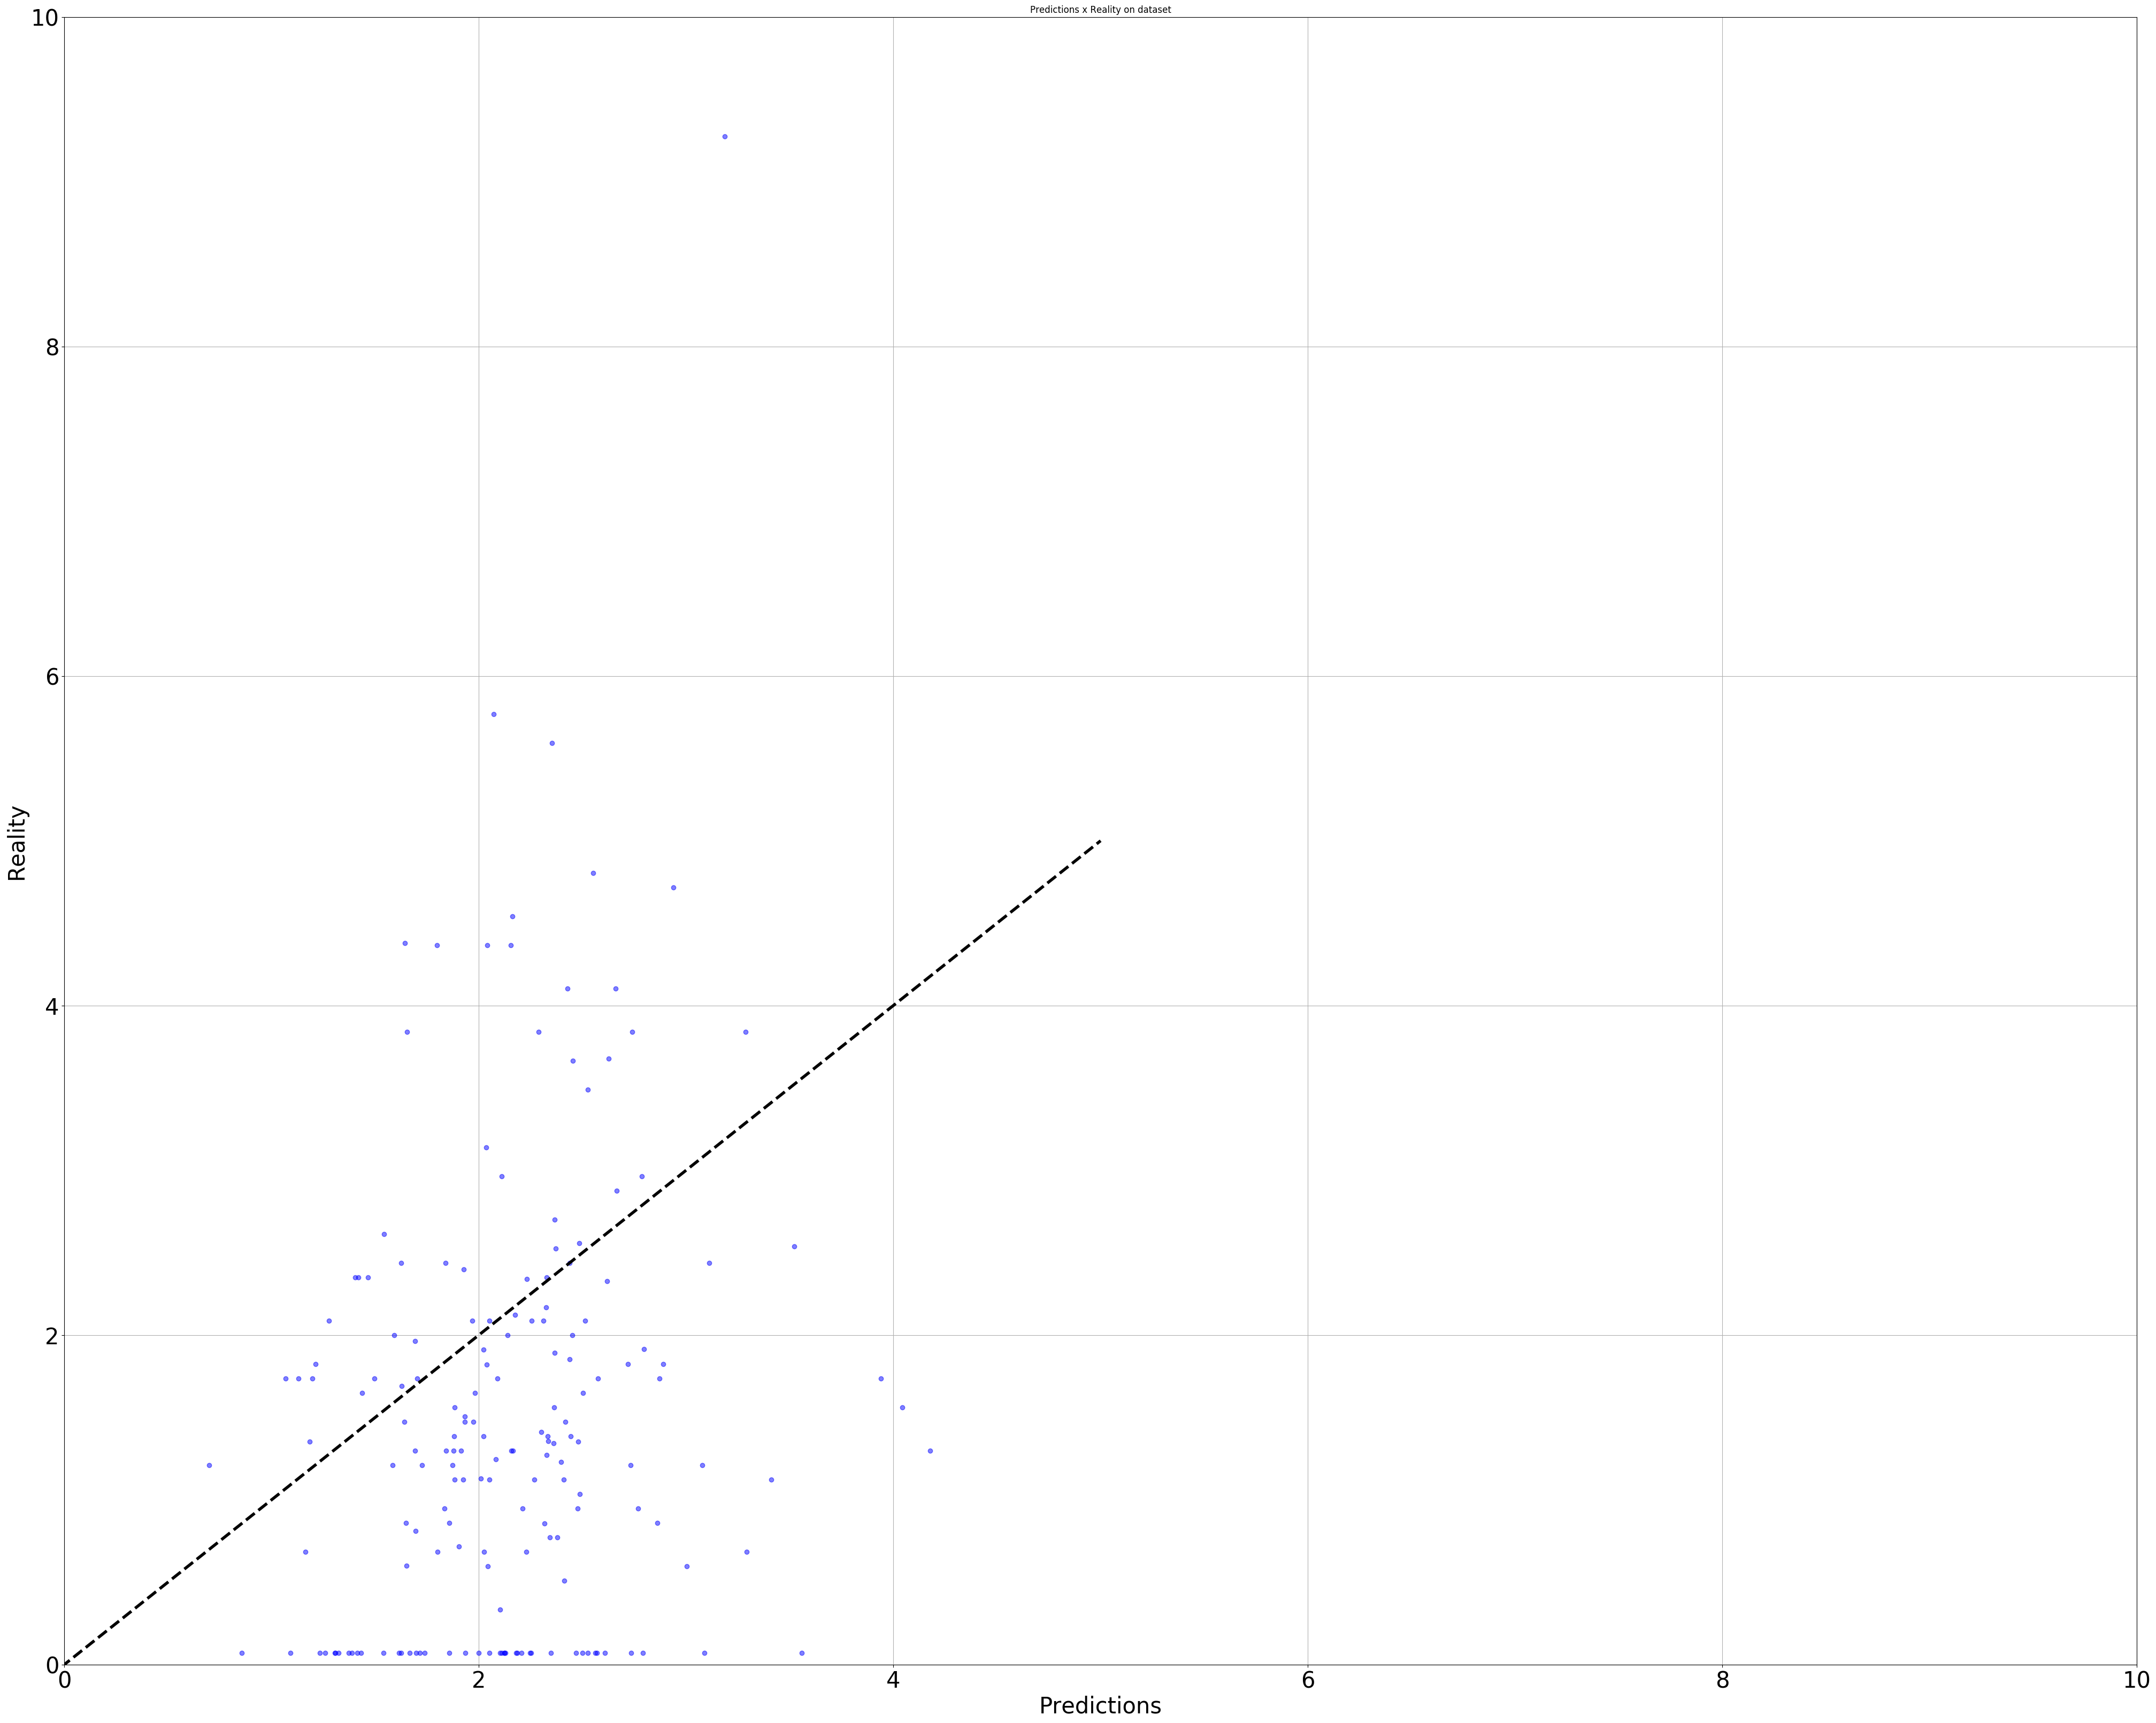

In [20]:
# Preprocessing dataset with MinMaxScale function

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove(OUTPUT)

# mat_train = np.matrix(train)
# #mat_input = np.matrix(input_dataset)
# mat_new = np.matrix(train.drop(OUTPUT, axis=1))
# mat_y = np.array(train[OUTPUT].reshape((train.shape[0], 1)))

# prepro_y = MinMaxScaler()
# prepro_y.fit(mat_y)

# prepro = MinMaxScaler()
# prepro.fit(mat_train)

# prepro_input = MinMaxScaler()
# prepro_input.fit(mat_new)

mat_train = train.copy()
prepro = MinMaxScaler(copy=True, feature_range=(0, 1))
# prepro = QuantileTransformer(ignore_implicit_zeros=True)
# prepro = RobustScaler()
#prepro = StandardScaler(copy=True, with_mean=True, with_std=True)

prepro_y = MinMaxScaler(copy=True, feature_range=(0, 1))
# prepro_y = QuantileTransformer(ignore_implicit_zeros=True)
# prepro_y = RobustScaler()
#prepro_y = StandardScaler(copy=True, with_mean=True, with_std=True)

mat_y = prepro_y.fit_transform(train[OUTPUT].values.reshape(-1,1))

train = pd.DataFrame(prepro.fit_transform(mat_train), columns=col_train)

#input_dataset = pd.DataFrame(prepro_input.transform(mat_input), columns=col_train_bis)

# List of features

COLUMNS = col_train
FEATURES = col_train_bis


# Training set and Prediction set with the features to predict

training_set = train[COLUMNS]
prediction_set = train[OUTPUT]


# Train and Test split

x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES], prediction_set, test_size=0.1, random_state=42)
y_train = pd.DataFrame(y_train, columns=[OUTPUT])
training_set = pd.DataFrame(x_train, columns=FEATURES).merge(y_train, left_index=True, right_index=True)


# Training for submission

training_sub = training_set[col_train]
y_test = pd.DataFrame(y_test, columns=[OUTPUT])
testing_set = pd.DataFrame(x_test, columns=FEATURES).merge(y_test, left_index=True, right_index=True)


# Model

lr_sklearn = sklearn.linear_model.LinearRegression(fit_intercept=False, copy_X=True, n_jobs=-1)


# Reset the index of training

training_set.reset_index(drop=True, inplace=True)


# Deep Neural Network Regressor with the training set which contain the data split by train test split

lr_sklearn.fit(np.matrix(training_set.drop([OUTPUT], axis=1)),np.array(training_set[OUTPUT].values.reshape((training_set.shape[0], 1))))


# Predictions on testing set

lr_sklearn_y = lr_sklearn.predict(np.matrix(testing_set.drop([OUTPUT], axis=1)))


#inverse transformation of data

lr_sklearn_predictions = prepro_y.inverse_transform(lr_sklearn_y)
lr_sklearn_reality = linear_reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns=[COLUMNS])[OUTPUT].values

# Plot predictions x reality on dataset graph
    
font = {'family' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(50, 40))
axes = plt.gca()
axes.set_xlim([0, 10])
axes.set_ylim([0, 10])
plt.style.use('default')
plt.plot(lr_sklearn_predictions, lr_sklearn_reality, 'ro', color='blue',alpha = 0.5)
plt.xlabel('Predictions')
plt.ylabel('Reality')
plt.title('Predictions x Reality on dataset')
ax.grid()
ax.plot([-1, 5], [-1, 5], 'k--', lw=4)
plt.show()

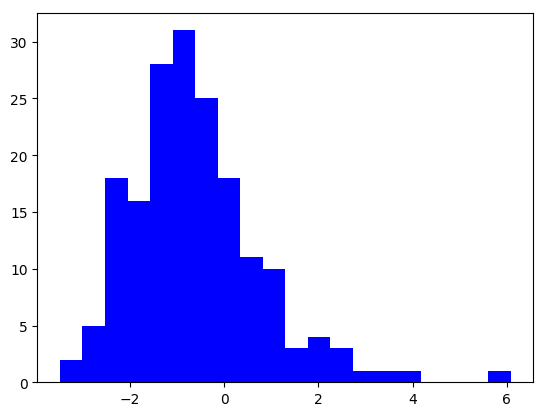

0.11482738440408813


In [21]:
error = []
for x in (lr_sklearn_reality) - lr_sklearn_predictions:
    error.append((float(x)))
error.sort()

plt.hist(error,bins = 20, color='blue') # plotting by columns
plt.show()

print(lr_sklearn.score(np.matrix(testing_set.drop([OUTPUT], axis=1)),
                       np.array(testing_set[OUTPUT].values.reshape((testing_set.shape[0], 1)))))

c:\users\lucac\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


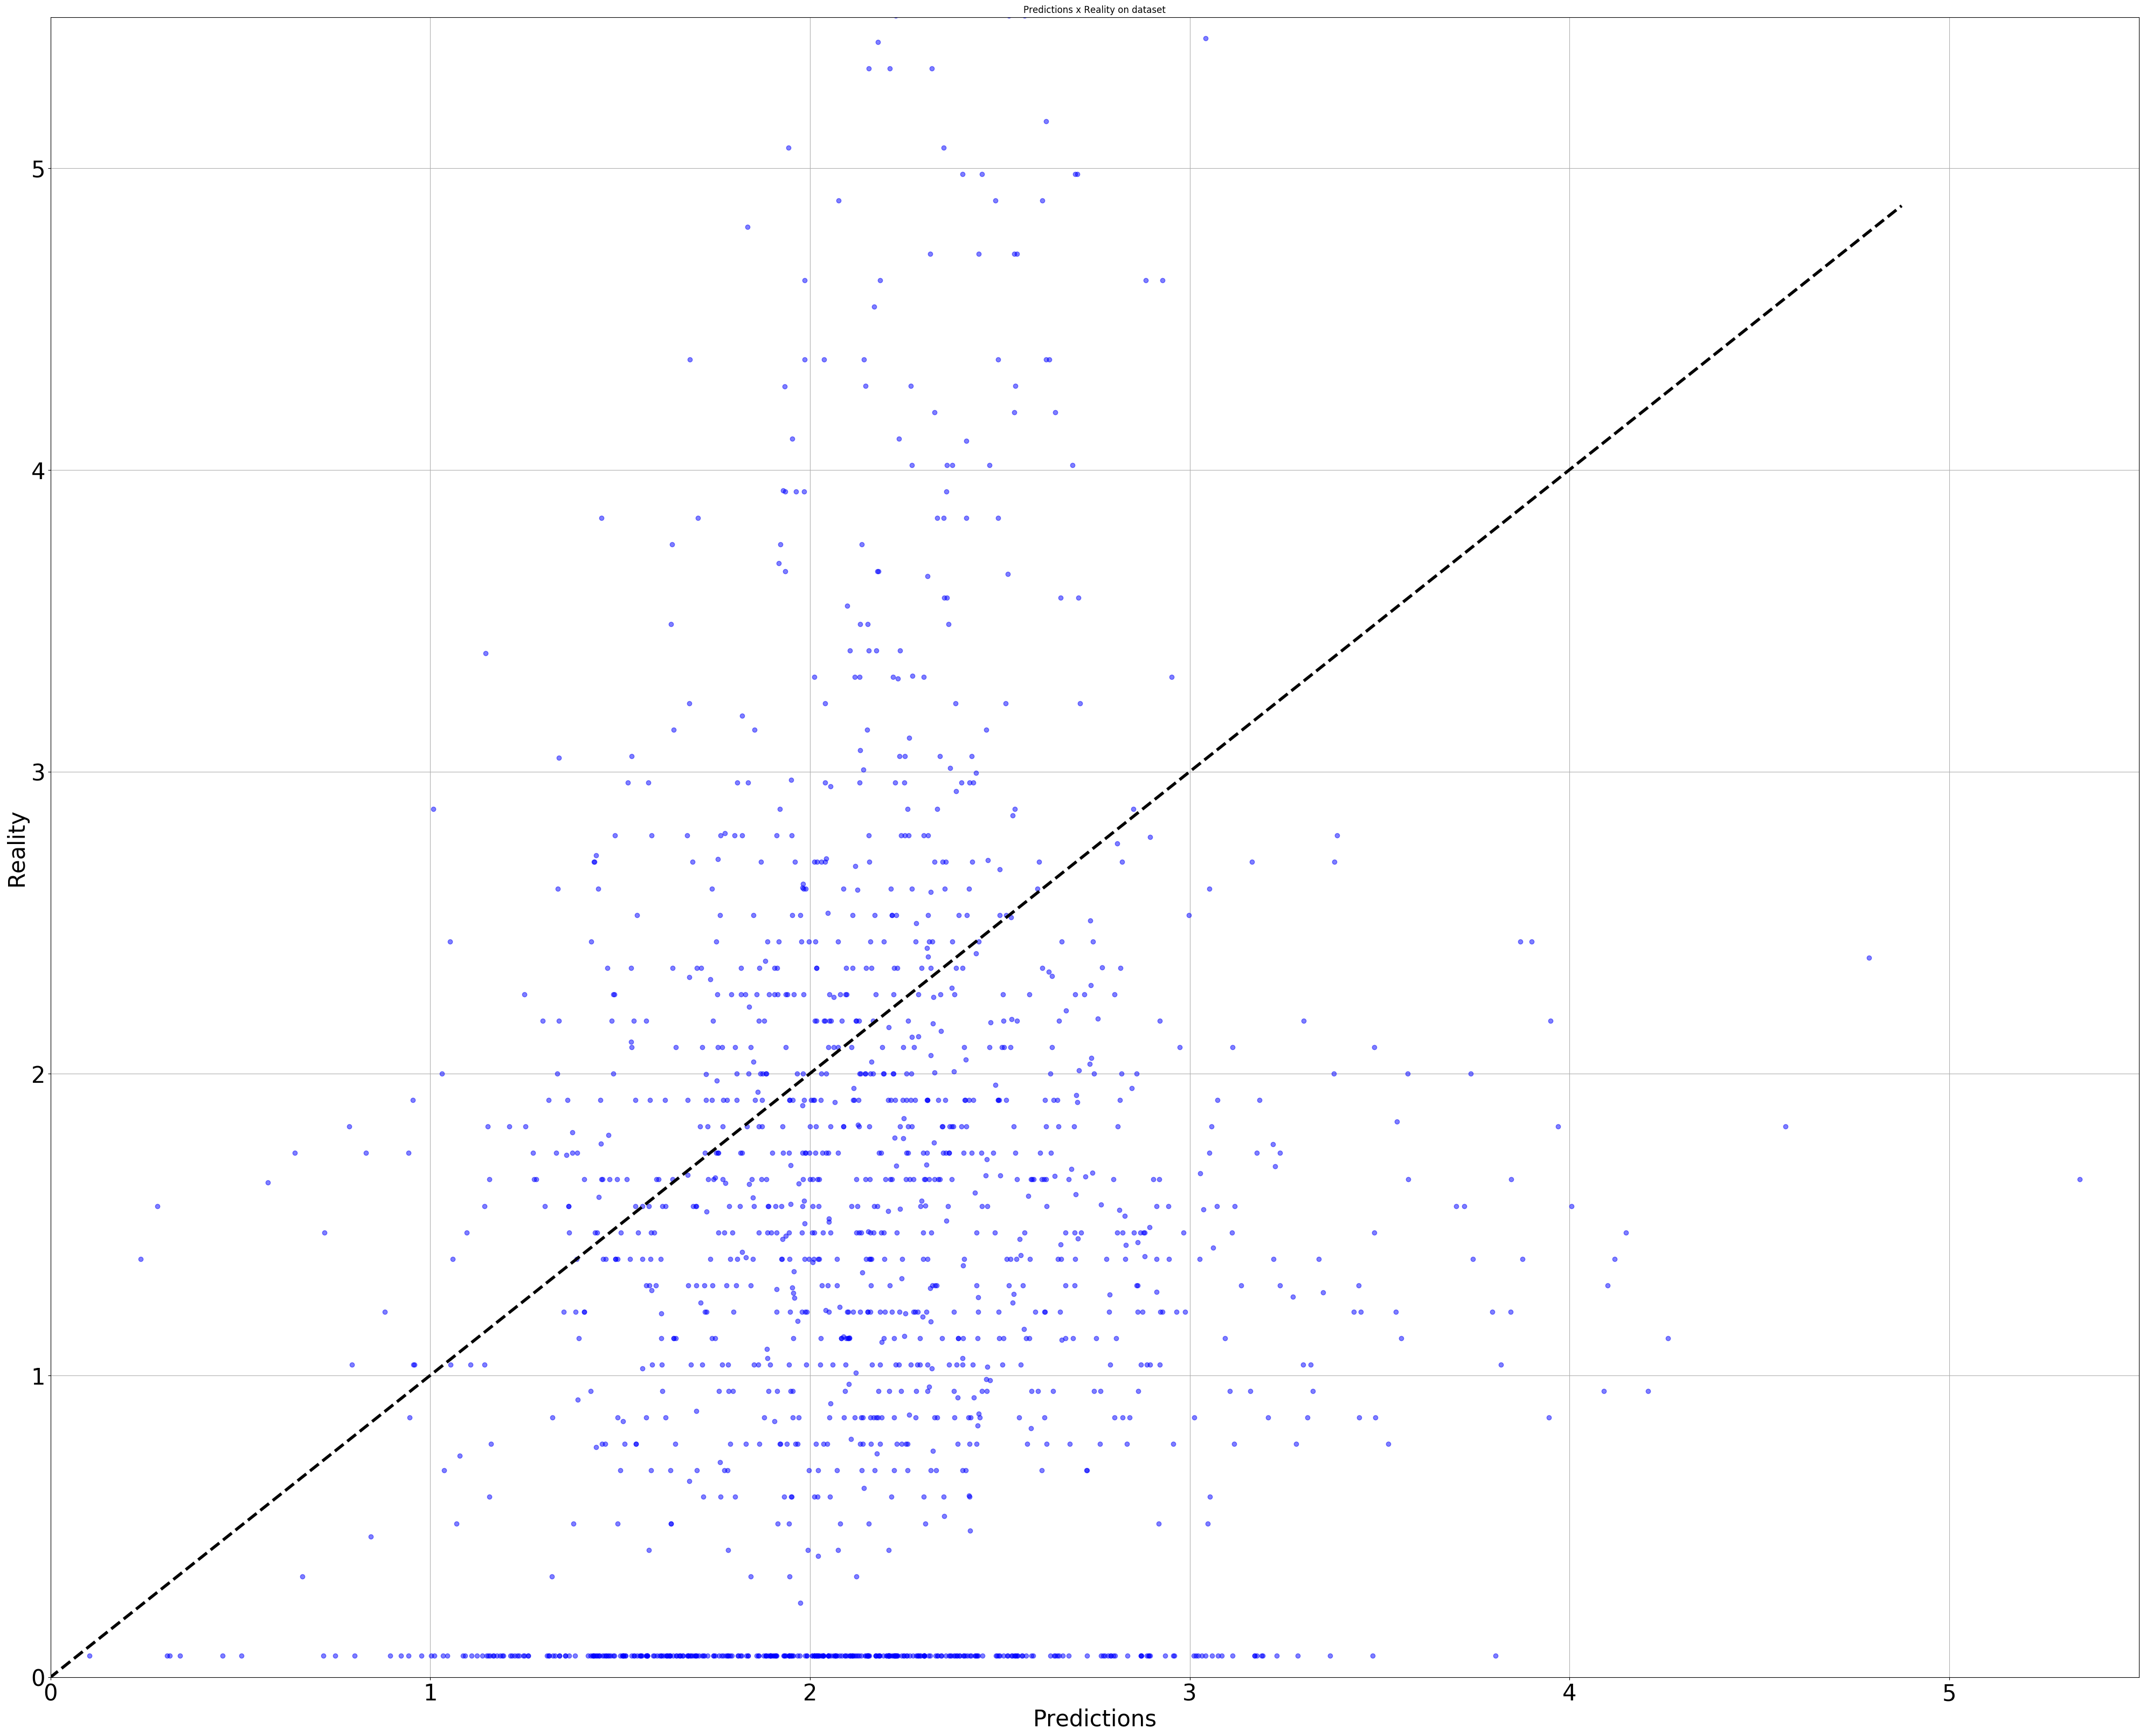

In [22]:
lr_sklearn_y = lr_sklearn.predict(np.matrix(training_set.drop([OUTPUT], axis=1)))

lr_sklearn_predictions = prepro_y.inverse_transform(lr_sklearn_y)
lr_sklearn_reality = pd.DataFrame(prepro.inverse_transform(training_set), columns=[COLUMNS])[OUTPUT].values

# Plot predictions x reality on dataset graph
    
font = {'family' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(50, 40))
axes = plt.gca()
axes.set_xlim([0, 5.5])
axes.set_ylim([0, 5.5])
plt.style.use('default')
plt.plot(lr_sklearn_predictions, lr_sklearn_reality, 'ro', color='blue',alpha = 0.5)
plt.xlabel('Predictions')
plt.ylabel('Reality')
plt.title('Predictions x Reality on dataset')
ax.grid()
ax.plot([-1, 4.875], [-1, 4.875], 'k--', lw=4)
plt.show()

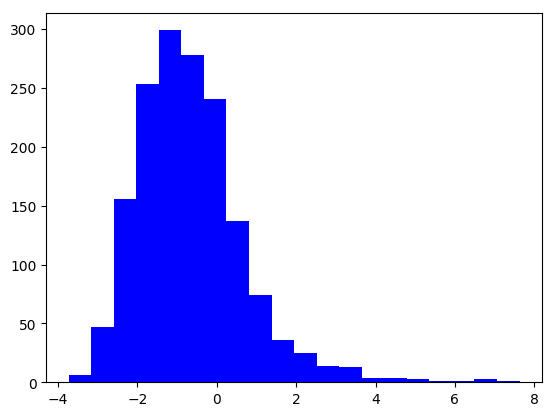

In [23]:
error = []
for x in (lr_sklearn_reality) - lr_sklearn_predictions:
    error.append((float(x)))
error.sort()

plt.hist(error,bins = 20, color='blue') # plotting by columns
plt.show()

In [24]:
lista_colonne_json = list(train.columns.values)
scale_df = pd.DataFrame(columns= lista_colonne_json)
#scale_df.loc[1] = prepro.mean_
#scale_df.loc[2] = prepro.var_

lista_colonne_json.remove(OUTPUT)

df_coeff = pd.DataFrame(lr_sklearn.coef_, columns = lista_colonne_json)

scale_df = scale_df.append(df_coeff)
scale_df.to_json('Standardizzazione.txt',orient='records')
scale_df

,Go_score,Go_score+1,Go_score-1,Go_score-2,rpe-1,rpe-2,workload,workload-1,workload-2
0,0.188278,-0.307102,0.180603,0.167457,-0.081615,-0.158338,NaN,0.103247,0.315405


In [25]:
pd.DataFrame(lr_sklearn_reality)[0].value_counts()

0.071056    386
1.648722     53
1.911667     52
1.385778     51
1.473426     48
1.210482     47
1.736371     45
1.035185     43
1.561074     39
0.772241     38
0.859889     37
1.824019     36
1.122834     34
1.999315     32
2.262259     29
0.947537     29
1.298130     29
2.174611     26
2.086963     24
2.349908     23
0.684593     21
2.437556     20
2.700500     18
2.525204     16
0.596945     15
2.788148     15
0.509297     12
2.612852     12
2.963445     11
4.365815      7
           ... 
1.541519      1
1.578348      1
2.009945      1
1.056571      1
2.608272      1
1.660481      1
0.906181      1
7.258204      1
3.007417      1
0.984176      1
2.782913      1
0.871850      1
1.543459      1
9.800000      1
1.518715      1
1.256471      1
5.768185      1
1.698350      1
2.121456      1
6.206426      1
1.671701      1
1.226450      1
2.707386      1
0.847827      1
1.022979      1
1.562664      1
1.476778      1
1.661712      1
8.923519      1
1.785587      1
Name: 0, Length: 299, dt